In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df_occ = pd.read_csv('../../BASE_DE_DADOS_CNES_202003/dataset/ocupacao.csv')

In [90]:
from tensorflow.keras import layers

In [124]:
model = tf.keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None,1),return_sequences=True))
model.add(layers.Dense(1))

In [125]:
model.build(input_shape=(None,None,1))

In [126]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, None, 64)          16896     
_________________________________________________________________
dense_14 (Dense)             (None, None, 1)           65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


## Séries temporais de ocupação

In [137]:
df_occ['p_disp'] = df_occ['disponiveis']/df_occ['QT_EXIST']

In [139]:
unidades = df_occ['Unidade'].unique()

v = []
for u in unidades:
    v.append(df_occ[df_occ['Unidade']==u]['p_disp'].values)

In [140]:
import matplotlib.pyplot as plt

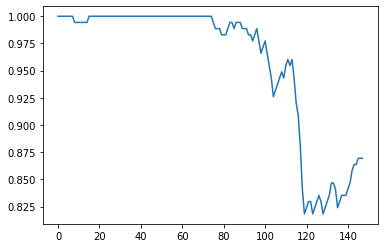

In [141]:
plt.plot(v[5])

In [166]:
data = v[5].reshape((-1,1))
X = data[:-7]
Y = data[7:]

In [167]:
metrics = [
            tf.keras.metrics.MSE
        ]

In [168]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.MSE,
        metrics=metrics
    )

In [169]:
Xin = np.expand_dims(X,0)
Yin = np.expand_dims(Y,0)

In [170]:
model.fit(
    Xin, Yin,epochs=100)

Train on 1 samples
Epoch 1/100
1/1 [==============================] - 1s 1s/sample - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 2/100
1/1 [==============================] - 0s 32ms/sample - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 3/100
1/1 [==============================] - 0s 31ms/sample - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 4/100
1/1 [==============================] - 0s 37ms/sample - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 5/100
1/1 [==============================] - 0s 32ms/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 6/100
1/1 [==============================] - 0s 38ms/sample - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 7/100
1/1 [==============================] - 0s 39ms/sample - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 8/100
1/1 [==============================] - 0s 54ms/sample - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 9/100
1/1 [==============================] - 0s 44ms/sample - loss: 0.0046 - mean_squared_error: 

Epoch 75/100
1/1 [==============================] - 0s 56ms/sample - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 76/100
1/1 [==============================] - 0s 39ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 77/100
1/1 [==============================] - 0s 40ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 78/100
1/1 [==============================] - 0s 40ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 79/100
1/1 [==============================] - 0s 43ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 80/100
1/1 [==============================] - 0s 41ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 81/100
1/1 [==============================] - 0s 60ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 82/100
1/1 [==============================] - 0s 57ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 83/100
1/1 [==============================] - 0s 45ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
E

In [171]:
Xout = model.predict(Xin)

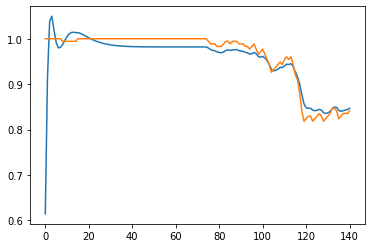

In [172]:
plt.plot(Xout[0,:,0])
plt.plot(Xin[0,:,0])